In [1]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap
from collections import defaultdict
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.gridspec as gridspec

import estaudel.escaffolding as escaffolding
import estaudel.stochastic as stochastic
import estaudel.heredity.process as ehp
import estaudel.heredity.deterministic as ehd
import estaudel.heredity.stochastic as ehs
import estaudel.heredity.display 

panel_dict = dict(xy=(1, 1), xycoords="axes fraction",
           ha='center', va='center',
            bbox=dict(boxstyle="round",
               ec=(.1, 0.1, .1),
               fc=(1., 1, 1),
           ))

fontdict={'fontweight': 'normal', 'size':'x-large'}

Here are the commands to generate the data: 

Continuing the trajectory from `full.pkle` without mutation nor selection. 

```bash
./full_trajectory.py --N 1000 --continue \"full.pkle\" --NPROC 8 --selection \"neutral\" --name \"cont\" --mutation_rate 0
```

Same, but forcing a reset of the traits values: 

```bash
./full_trajectory.py --N 1000 --continue \"full.pkle\" --NPROC 8 --selection \"neutral\" --name \"cont\" --mutation_rate 0  --force_traits True
```

In [2]:
path_derived = 'cont_20190426_080331_NPROC8_mutation_rate0_N1000_continue"full.pkle"_selection"neutral".pkle'
path_intial = 'cont_20190426_084814_mutation_rate0_selection"neutral"_N1000_force_traitsTrue_NPROC8_continue"full.pkle".pkle'

In [3]:
data_derived = escaffolding.load(path_derived)
data_initial = escaffolding.load(path_intial)
for d in [data_initial, data_derived]:
    print(d)
    print("\n".join(["{}: {}".format(k,v) for k,v in sorted(d.parameters.items())]))
    print('-'*80)

Ecological scaffolding data 999 generations
B: 15
D: 1000
N: 1000
NPROC: 8
T: 1
carrying_capacity: 1500
collectiveSelectionStrength: 1
continue: full.pkle
force_traits: True
goal: 0.5
initial_type0: (0, 6, 0.8, 0.15)
initial_type1: (1, 4, 0.3, 0.15)
max_types: 4
mutation_effect: {1: 0.1, 3: 0.1}
mutation_rate: 0
name: cont
percentile: 20
selection: neutral
skip: 100
steps: 100
--------------------------------------------------------------------------------
Ecological scaffolding data 999 generations
B: 15
D: 1000
N: 1000
NPROC: 8
T: 1
carrying_capacity: 1500
collectiveSelectionStrength: 1
continue: full.pkle
goal: 0.5
initial_type0: (0, 6, 0.8, 0.15)
initial_type1: (1, 4, 0.3, 0.15)
max_types: 4
mutation_effect: {1: 0.1, 3: 0.1}
mutation_rate: 0
name: cont
percentile: 20
selection: neutral
skip: 100
steps: 100
--------------------------------------------------------------------------------


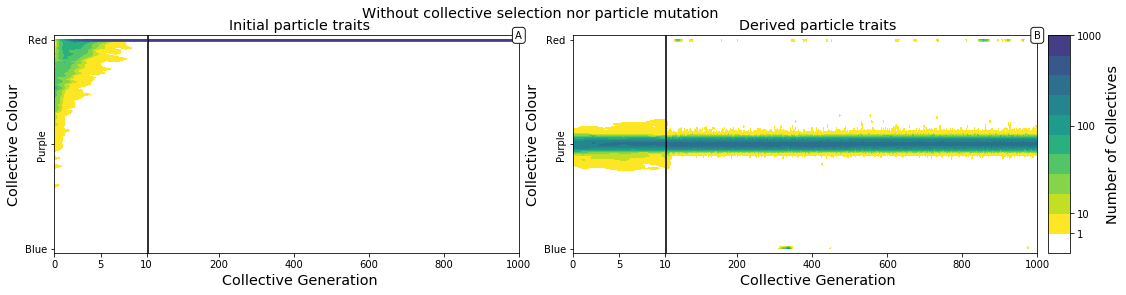

In [5]:
fig = plt.figure(figsize=(15,4))

# Axes grid spec. 
grid_left =  gridspec.GridSpec(nrows=1, ncols=5, left=0.05, right=0.48, wspace=0.01, hspace=0.3)
grid_right = gridspec.GridSpec(nrows=1, ncols=5, left=0.53, right=0.96, wspace=0.01, hspace=0.3)
grid_colorbar = gridspec.GridSpec(nrows=1, ncols=1, left=0.97, right=0.99, wspace=0.01, hspace=0.3)

# Create the axes
cax = fig.add_subplot(grid_colorbar[0, 0])
ax_left = fig.add_subplot(grid_left[0, 1:])
ax_left_zoom = fig.add_subplot(grid_left[0, 0])
ax_right = fig.add_subplot(grid_right[0, 1:])
ax_right_zoom = fig.add_subplot(grid_right[0, 0])

# Label the panels 
ax_left.annotate('A', **panel_dict)
ax_right.annotate('B', **panel_dict)
sup = fig.suptitle('Without collective selection nor particle mutation', fontsize='x-large')

# Plot density
estaudel.heredity.display.plot_density(data_initial, ax_left, zoom_first=10,
             title='Initial particle traits', 
             ax_zoom=ax_left_zoom,
             colorbar=True, 
             cax=cax)
estaudel.heredity.display.plot_density(data_derived, ax_right, zoom_first=10, 
             title='Derived particle traits', 
             ax_zoom=ax_right_zoom)

plt.savefig('nomutation_norselection.png', bbox_inches='tight')